# Decision Tree Classifier with Chi2 feature selection

In [403]:
#load in dataset
mushroom_df = pd.read_csv('mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [404]:
#create new column for model target
mushroom_df['Class Combined'] = mushroom_df['class'].replace(to_replace = ['p','e'], value=[1,0])
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class Combined
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


In [405]:
#convert all features to dummy variables using get_dummies
mushroom_df = pd.get_dummies(mushroom_df)
mushroom_df.head()

,Class Combined,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Split the data into a training and test set.

In [406]:
#split data into training and test set using 80/20 split
x_mushroom = mushroom_df.drop(['class_e', 'class_p', 'Class Combined'], axis=1)
y_mushroom = mushroom_df['Class Combined']

x_train_mush, x_test_mush, y_train_mush, y_test_mush = train_test_split(x_mushroom, y_mushroom, test_size = 0.2)

In [407]:
from sklearn.tree import DecisionTreeClassifier

#create decision tree model and fit on training set
decisiontree = DecisionTreeClassifier()
model_dc = decisiontree.fit(x_train_mush, y_train_mush)
y_pred_decisiontree = model_dc.predict(x_test_mush)

In [408]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#calculate accuracy score
accuracy_score(y_test_mush, y_pred_decisiontree)

1.0

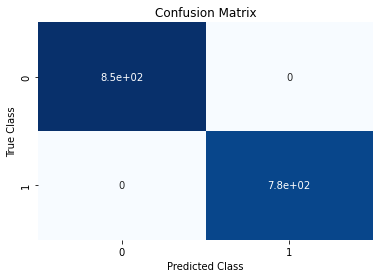

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

#create a confusion matrix using sklearn.metrics
matrix = confusion_matrix(y_test_mush, y_pred_decisiontree)

confusion_df = pd.DataFrame(matrix)

sns.heatmap(confusion_df, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

[Text(204.60000000000002, 203.85, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3360, 3139]'),
 Text(130.20000000000002, 176.67000000000002, 'X[53] <= 0.5\ngini = 0.29\nsamples = 3688\nvalue = [649, 3039]'),
 Text(93.0, 149.49, 'X[63] <= 0.5\ngini = 0.133\nsamples = 3240\nvalue = [233, 3007]'),
 Text(74.4, 122.31, 'X[101] <= 0.5\ngini = 0.046\nsamples = 3080\nvalue = [73, 3007]'),
 Text(55.800000000000004, 95.13, 'X[22] <= 0.5\ngini = 0.022\nsamples = 3041\nvalue = [34, 3007]'),
 Text(37.2, 67.94999999999999, 'X[25] <= 0.5\ngini = 0.009\nsamples = 3021\nvalue = [14, 3007]'),
 Text(18.6, 40.77000000000001, 'gini = 0.0\nsamples = 3007\nvalue = [0, 3007]'),
 Text(55.800000000000004, 40.77000000000001, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(74.4, 67.94999999999999, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(93.0, 95.13, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(111.60000000000001, 122.31, 'gini = 0.0\nsamples = 160\nvalue = [160, 0]'),
 Text(167.4, 1

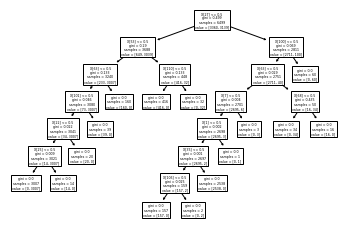

In [410]:
from sklearn.tree import plot_tree

#visualize decision tree using sklearn plot_tree
plot_tree(model_dc)

In [411]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

#use chi2 statistic selector to pick five best features
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(x_train_mush, y_train_mush)

In [412]:
#filter out five features selected using get_support
features = np.array(x_train_mush.columns)
filter = chi2_selector.get_support()
print(features[filter])

['odor_f' 'odor_n' 'gill-color_b' 'stalk-surface-above-ring_k'
 'stalk-surface-below-ring_k']


In [413]:
#create decision tree classifier model for five best features
decisiontree_five_features = DecisionTreeClassifier()
model_dtcfive = decisiontree_five_features.fit(features_kbest, y_train_mush)

dtc_five_test = chi2_selector.transform(x_test_mush)

decisiontree_five_pred = model_dtcfive.predict(dtc_five_test)

In [414]:
#calculate accuracy score for five best features
accuracy_score(y_test_mush, decisiontree_five_pred)

0.9335384615384615

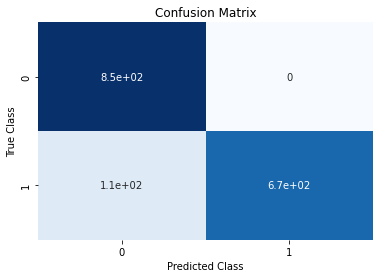

In [415]:
#plot confusion matrix for five best features
matrix_two = confusion_matrix(y_test_mush, decisiontree_five_pred)

confusion_df_two = pd.DataFrame(matrix_two)

sns.heatmap(confusion_df_two, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

Summarize your findings.

The first decision tree including all the features had an accuracy score of 100%. When reduced to the 5 best features using X2 it dropped to 93.35%. This indicates that you are still able to gain a very accurate prediction using only those 5 features.